No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


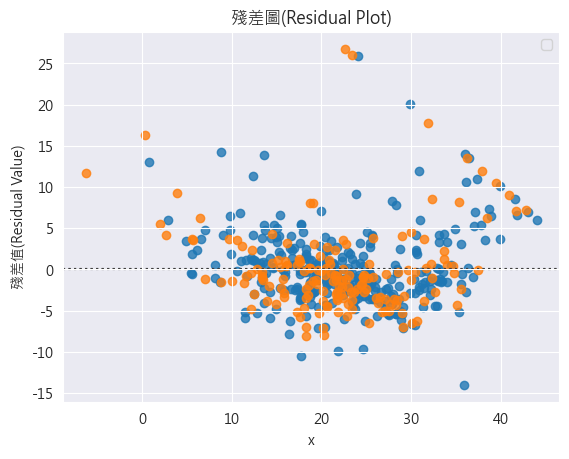

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw_df = pd.read_csv("boston.csv", sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
target = pd.DataFrame(target, columns=["MEDV"])
y = target["MEDV"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_train = lm.predict(XTrain)
pred_test = lm.predict(XTest)

plt.rcParams["axes.unicode_minus"] = False
sns.set_style("darkgrid", {"axes.axisbelow": False,
                       "font.sans-serif":['Microsoft JhengHei']})

df = pd.DataFrame({"x": pred_train, "y": yTrain})
df2 = pd.DataFrame({"x": pred_test, "y": yTest})
sns.residplot(x="x", y="y", data=df)
sns.residplot(x="x", y="y", data=df2)
plt.title("殘差圖(Residual Plot)")
plt.ylabel("殘差值(Residual Value)")
plt.legend()
plt.show()
plt.show()
